In [44]:
import matplotlib.pyplot as plt

def plot_return_mdd(total_return, tag='', axv_index=[]):
    fig, ax = plt.subplots(figsize=(16, 5))
    MDD_series = total_return.cummax()-total_return
    high_index = total_return[total_return.cummax() == total_return].index
    (total_return).plot(label='Total Return', ax=ax, c='r')
    mdd = round(max(MDD_series), 2)
    plt.fill_between(MDD_series.index, -MDD_series,
                        0, facecolor='r', label='DD')
    plt.scatter(
        high_index, total_return.loc[high_index], c='#02ff0f', label='High')
    plt.legend()
    plt.ylabel('Return%')
    plt.xlabel('Date')
    for index in axv_index:
        plt.axvline(index, color='black', zorder=0)

    if tag == '':
        plt.title(f'Return & MDD ({mdd})', fontsize=16)
    else:
        plt.title(f'Return & MDD ({mdd}) - {tag}', fontsize=16)
    plt.show()

In [45]:
import pickle 
import pandas as pd

long = './long_trades.pkl'
short = './short_trades.pkl'
long_f = open(long,'rb')
short_f = open(short,'rb')
long_trades = pickle.load(long_f)
long_trades = long_trades.set_index('Entry Index')
short_trades = pickle.load(short_f)
trades = pd.concat([long_trades, short_trades])
trades = trades.reset_index()

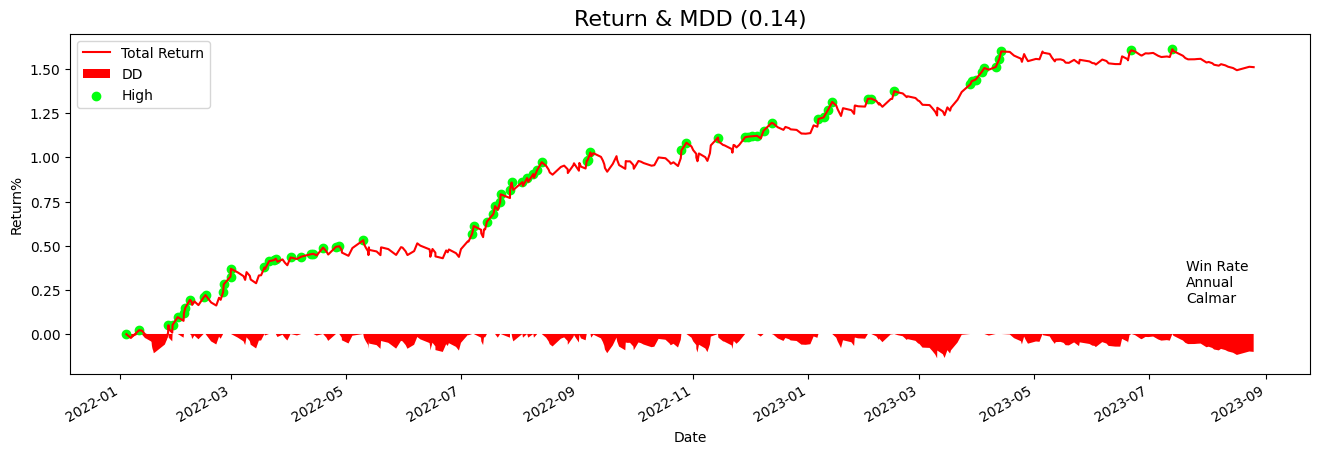

In [46]:
plot_return_mdd(long_trades['Return'].cumsum())